
# Recommendation system project
## Alok Sawant 

# Context:

India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.

# Import Libraries

In [63]:
#Import required libraries
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import joblib
#from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# Read and explore the dataset

In [64]:
#Data Import
#Read and explore the dataset. ( Rename column, plot histograms, find data characteristics)
#Import the data set
df1 = pd.read_csv('phone_user_review_file_1.csv', engine='python')
df2 = pd.read_csv('phone_user_review_file_2.csv', engine='python')
df3 = pd.read_csv('phone_user_review_file_3.csv', engine='python')
df4 = pd.read_csv('phone_user_review_file_4.csv', engine='python')
df5 = pd.read_csv('phone_user_review_file_5.csv', engine='python')
df6 = pd.read_csv('phone_user_review_file_6.csv', engine='python')

In [65]:
df1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [66]:
df2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [67]:
df3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versões mel...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenção na entrega. O aparelho é mui...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [68]:
df4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [69]:
df5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [70]:
df6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [71]:
# Merging all csv's into one single dataframe 
frames = [df1, df2, df3, df4, df5, df6]

In [72]:
df = pd.concat(frames)

In [73]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [74]:
df.shape

(1415133, 11)

The final dataframe contains 11 columns and 1415133 rows 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


In the given dataset 2 columns contains numberical values.

In [76]:
df.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


In [77]:
#Checking for null values in the dataframe 
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [78]:
# Dropping rows where atlease one element is missing 
df = df.dropna()

In [79]:
df.shape

(1275917, 11)

In [80]:
# Checking for null values
df.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [81]:
# Number of unique user id and product id in the data
print('Number of unique Authur in Raw data = ', df['author'].nunique())
print('Number of unique Product in Raw data = ', df['product'].nunique())
print('Number of unique country in Raw data = ', df['country'].nunique())
print('Number of unique languages in Raw data = ', df['lang'].nunique())
print('Number of unique Source in Raw data = ', df['source'].nunique())


Number of unique Authur in Raw data =  770521
Number of unique Product in Raw data =  54872
Number of unique country in Raw data =  40
Number of unique languages in Raw data =  20
Number of unique Source in Raw data =  284


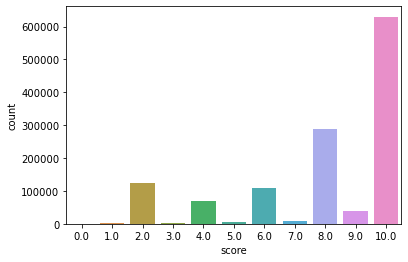

In [106]:
sns.countplot(df['score']);

 Round off scores to the nearest integers

In [107]:
df['score'] = df['score'].round()

In [108]:
# find minimum and maximum ratings
print('The minimum rating is: %d' %(df['score'].min()))
print('The maximum rating is: %d' %(df['score'].max()))

The minimum rating is: 0
The maximum rating is: 10


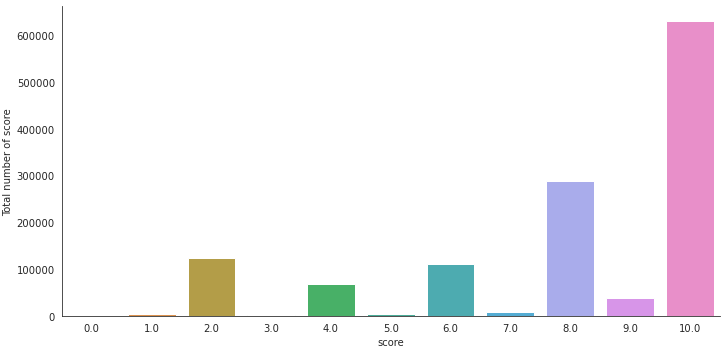

In [109]:
# Check the distribution of ratings 
with sns.axes_style('white'):
    g = sns.factorplot("score", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of score") 

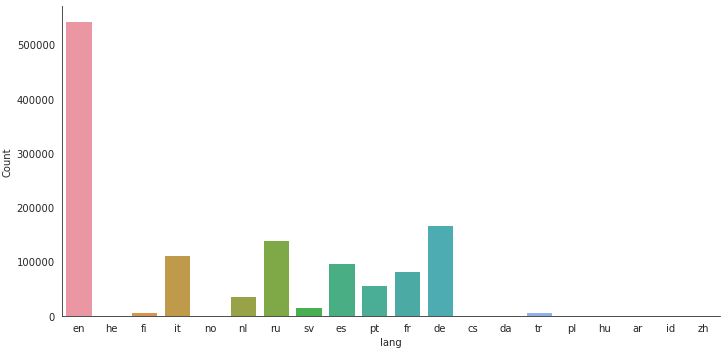

In [110]:
# Check the distribution of score
with sns.axes_style('white'):
    g = sns.factorplot("lang", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Count") 

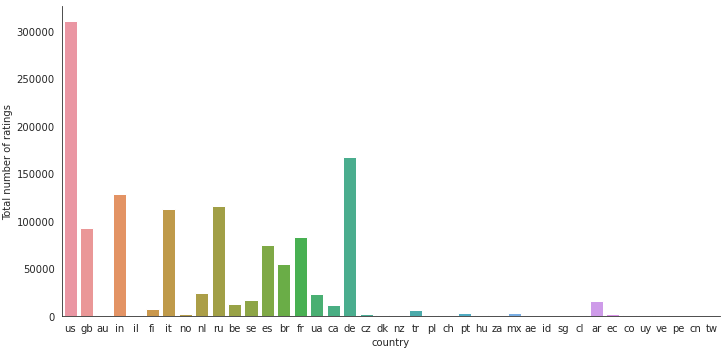

In [111]:
# Check the distribution of ratings 
with sns.axes_style('white'):
    g = sns.factorplot("country", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 


## Check the number of rows and columns

In [112]:
rows, columns = df.shape
print("No of rows: ", rows) 
print("No of columns: ", columns) 

No of rows:  1275917
No of columns:  11


In [113]:
# Summary statistics of 'rating' variable
df['score'].describe().transpose()

count    1.275917e+06
mean     8.009546e+00
std      2.622740e+00
min      0.000000e+00
25%      7.000000e+00
50%      9.000000e+00
75%      1.000000e+01
max      1.000000e+01
Name: score, dtype: float64

In [117]:
# checking for duplicate values in the dataframe
df.duplicated().sum()

0

In [118]:
# Dropping duplicate values 
df = df.drop_duplicates()

In [119]:
df.shape

(1271437, 11)

In [121]:
# Keeping 1000000 data samples. Using random state=612.
df.sample(n=1000000, random_state=612)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
20276,/cellphones/lenovo-vibe-k5/,7/25/2016,en,in,Amazon,amazon.in,10.0,10.0,Good product in this price...,KHILESH KUMAR VERMA,"Lenovo Vibe K5 (Gold, VoLTE update)"
104794,/cellphones/samsung-galaxy-s6/,11/10/2016,es,es,Samsung,samsung.com,8.0,10.0,"En general me gusta mucho mi nuevo S6, el reco...",Evyta,Samsung Galaxy S6
321393,/cellphones/sony-ericsson-k810i/,1/3/2010,ru,ru,Yandex,market.yandex.ru,8.0,10.0,несмотря на недостатки в общем аппаратом довол...,VanRaZor,Sony Ericsson K810i
78000,/cellphones/sony-xperia-z2/,7/19/2014,ru,ua,Hotline.ua,hotline.ua,6.0,10.0,Есть уже развернутый отзыв с которым я почти с...,ruga,Sony Xperia Z2 (Black)
16933,/cellphones/samsung-galaxy-s7-edge/,10/21/2016,de,de,Otto.de,otto.de,10.0,10.0,Ein Wahnsinns Handy! Macht richtig schöne Bild...,einer Kundin,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,..."
...,...,...,...,...,...,...,...,...,...,...,...
243649,/cellphones/motorola-moto-x-2/,6/22/2015,pt,br,Bondfaro,bondfaro.com.br,6.0,10.0,O meu aparelho infelizmente veio com defeito: ...,e-bit,Smartphone Motorola Moto X 2ª Geração XT1097 3...
105387,/cellphones/lg-l70/,11/5/2014,it,it,Amazon,amazon.it,10.0,10.0,"Dopo una lunga ricerca ""di mercato"" mi sono in...",Stefano,"LG D320 L70 Smartphone, 4 GB, Bianco [Italia]"
138259,/cellphones/samsung-galaxy-j3-duos/,4/8/2016,nl,nl,Belsimpel,belsimpel.nl,8.0,10.0,Om 20:00 besteld en om 10:00 de volgende ochte...,Snel,Samsung Galaxy J3 (2016) J320 Black
107702,/cellphones/samsung-galaxy-mini/,11/25/2011,fr,fr,Amazon,amazon.fr,6.0,10.0,Les fonctionnalités de cet appareil sont aussi...,mb,Samsung Galaxy mini Smartphone Quadri band 3G+...


In [125]:
# Dropping irrelevant features from the dataframe 
r_df = df.drop(['phone_url', 'source', 'score_max', 'extract', 'domain'], axis=1)

In [126]:
r_df.head()

,date,lang,country,score,author,product
0,5/2/2017,en,us,10.0,CarolAnn35,Samsung Galaxy S8
1,4/28/2017,en,us,10.0,james0923,Samsung Galaxy S8
2,5/4/2017,en,us,6.0,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,5/2/2017,en,us,9.0,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,5/11/2017,en,us,4.0,S Ate Mine,Samsung Galaxy S8


In [130]:
# Identifying most rated featrues in the dataset
r_df.groupby('product')['score'].count().sort_values(ascending=False).head()

product
Lenovo Vibe K4 Note (White,16GB)     5223
Lenovo Vibe K4 Note (Black, 16GB)    4389
OnePlus 3 (Graphite, 64 GB)          4103
OnePlus 3 (Soft Gold, 64 GB)         3557
Huawei P8lite zwart / 16 GB          2707
Name: score, dtype: int64

In [131]:
# Identifying users with most number of reviews.
r_df.groupby('author')['score'].count().sort_values(ascending=False).head()

author
Amazon Customer    76933
Cliente Amazon     19300
e-bit               8411
Client d'Amazon     7716
Amazon Kunde        4746
Name: score, dtype: int64

In [133]:
# Keeping data for user who has given more than 50 ratings. 
counts = r_df['author'].value_counts()
df_final = r_df[r_df['author'].isin(counts[counts >= 50].index)]

In [134]:
# Keeping products having more than 50 ratings
counts = r_df['product'].value_counts()
df_final = r_df[r_df['product'].isin(counts[counts >= 50].index)]

In [137]:
df_final.shape

(832159, 6)

The final dataframe consist of 832159 rows and 6 columns 

In [146]:
print('Number of users who have rated 50 or more items =', len(df_final))
print('Number of unique Author in final data = ', df_final['author'].nunique())
print('Number of unique Products in final data = ', df_final['product'].nunique())

Number of users who have rated 50 or more items = 832159
Number of unique Author in final data =  524685
Number of unique Products in final data =  6170


# Build Popularity Recommender model. (Non-personalised)

In [199]:
#Split the data randomnly into test and train datasets
#Split the training and test data in the ratio 70:30
train_data, test_data = train_test_split(df_final, test_size = 0.3, random_state=0)
train_data.head()

,date,lang,country,score,author,product
39038,8/20/2014,en,us,10.0,jacki,"LG Optimus L90 D415 4G GSM Android Smartphone,..."
247079,7/15/2010,es,ar,8.0,GALLITO6969,Nokia 5130 Xpress Music
345873,2/27/2008,es,es,8.0,WAZZUPSNAKE,Nokia E61
204604,12/3/2012,ru,ru,8.0,Алексей,Samsung C6712 Star II Duos
134577,2/1/2013,es,es,8.0,pasionpuma84,Motorola DEFY


In [200]:
train_data.shape
test_data.shape

(249648, 6)

In [201]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('product').agg({'author': 'count'}).reset_index()
train_data_grouped.rename(columns = {'author': 'score_R'},inplace=True)
train_data_grouped.head()

,product,score_R
0,3 FILMS PROTECTION ECRAN SAMSUNG Galaxy Ace S5...,43
1,3100 / 3120,50
2,3220,48
3,5-Zoll- Android 4.2 Cubot P9 3G Smart Phone MT...,39
4,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,66


In [202]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score_R', 'product'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score_R'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,product,score_R,Rank
2381,"Lenovo Vibe K4 Note (White,16GB)",3655,1.0
2380,"Lenovo Vibe K4 Note (Black, 16GB)",3068,2.0
3629,"OnePlus 3 (Graphite, 64 GB)",2857,3.0
3630,"OnePlus 3 (Soft Gold, 64 GB)",2446,4.0
1620,Huawei P8lite zwart / 16 GB,1834,5.0


In [203]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['author'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [204]:
find_recom = [15,121,53]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the Author: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the Author: 15

      author                            product  score_R  Rank
2381      15   Lenovo Vibe K4 Note (White,16GB)     3655   1.0
2380      15  Lenovo Vibe K4 Note (Black, 16GB)     3068   2.0
3629      15        OnePlus 3 (Graphite, 64 GB)     2857   3.0
3630      15       OnePlus 3 (Soft Gold, 64 GB)     2446   4.0
1620      15        Huawei P8lite zwart / 16 GB     1834   5.0


Here is the recommendation for the Author: 121

      author                            product  score_R  Rank
2381     121   Lenovo Vibe K4 Note (White,16GB)     3655   1.0
2380     121  Lenovo Vibe K4 Note (Black, 16GB)     3068   2.0
3629     121        OnePlus 3 (Graphite, 64 GB)     2857   3.0
3630     121       OnePlus 3 (Soft Gold, 64 GB)     2446   4.0
1620     121        Huawei P8lite zwart / 16 GB     1834   5.0


Here is the recommendation for the Author: 53

      author                            product  score_R  Rank
2381      53   Lenovo Vibe K4 Note 

Since this is a popularity-based recommender model, recommendations remain the same for all users

We predict the products based on the popularity. It is not personalized to particular user

# Build Collaborative Filtering model.

In [377]:
import surprise
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

## item-based collaborative filtering

In [326]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})

In [331]:
# Load the dataset 
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_CF[['author', 'product', 'score']], reader)
trainset, testset = train_test_split(data, test_size=.15)

In [332]:
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [347]:
# Get prediction from specific user 
uid = str(12) # raw user from id
iid = str(30) # raw produt id

In [348]:
pred=algo.predict(uid, iid, verbose=True)

user: 12         item: 30         r_ui = None   est = 8.00   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [334]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [335]:
test_pred

[Prediction(uid='Чапурин Андрей', iid='Nokia Lumia 630', r_ui=10.0, est=8.004, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='mark', iid='Sony Xperia XA Dual (Graphite Black)', r_ui=2.0, est=8.004, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Amazon Customer', iid='Lenovo Vibe K5 (Grey, VoLTE update)', r_ui=6.0, est=5.948197707445206, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='MARIO', iid='Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', r_ui=10.0, est=8.004, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='ABelle', iid='Sony Xperia S', r_ui=8.0, est=8.004, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='ColinT', iid='Nokia Lumia 930 4G UK SIM-Free Smartphone - Orange (

In [336]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 2.6604


2.6604341006183305

## user-based collaborative filtering

In [352]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})

In [353]:
# Load the dataset 
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_CF[['author', 'product', 'score']], reader)
trainset, testset = train_test_split(data, test_size=.15)

In [354]:
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [355]:

pred=algo.predict(uid, iid, verbose=True)

user: 12         item: 30         r_ui = None   est = 8.00   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [356]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [357]:
test_pred

[Prediction(uid='Antoine N', iid='Samsung Galaxy Core Prime Smartphone débloqué 4G (Ecran: 4,5 pouces - 8 Go - Simple SIM - Android 4.4 KitKat) Blanc', r_ui=10.0, est=8.00164705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='THIAGORODINES', iid='Nokia N900', r_ui=10.0, est=8.00164705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Monbijou', iid='BLU Studio 5.5 D610a Unlocked Dual SIM GSM Phone (Yellow)', r_ui=6.0, est=8.00164705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Перфильев Александр', iid='LG L40 D170', r_ui=10.0, est=8.00164705882353, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='BvE', iid='Sony Xperia Z5 Compact Smartphone (4,6 Zoll (11,7 cm) Touch-Display, 32 GB interner Speicher, Android 5.1) gelb', r_ui=8.0, est=8.00164705882353, details={'was_impossible': True, 

In [359]:
# get RMSE
print("user-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

user-based Model : Test Set
RMSE: 2.6161


2.6160566662181077

# SVD method

In [385]:
df_CF = pd.concat([train_data, test_data]).reset_index()
df_CF.tail()

,index,date,lang,country,score,author,product
832154,336531,5/28/2014,es,es,10.0,Cliente Amazon,Motorola Moto G (3ª Generación) + Carcasa Ofic...
832155,88541,11/13/2010,en,us,10.0,david matthews,"Apple iPhone 4 Verizon Cellphone, 8GB, White"
832156,30515,10/6/2014,it,it,6.0,paolo sermenghi,thl 5000 Smartphone Dual Sim Android Octa Core...
832157,93662,2/15/2015,en,us,2.0,Alejandro T.,"Motorola Nexus 6 Unlocked Smartphone, 32 GB, U..."
832158,39431,11/15/2013,pt,br,2.0,jonatan,Nokia Asha 202


In [386]:
# Keeping 5000 data samples. Using random state=612.
df_CF=df_CF.sample(n=5000, random_state=612)

In [436]:
df_CF.shape

(5000, 7)

In [437]:
## Calculate the density of the rating matrix

In [438]:
final_ratings_matrix = pd.pivot_table(df_CF,index=['author'], columns = 'product', values = "score")
final_ratings_matrix.fillna(0,inplace=True)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (4241, 2756)
given_num_of_ratings =  4792
possible_num_of_ratings =  11688196
density: 0.04%


In [439]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

author,#,$hopcheapa,1774,1thatonecaliguy,2.35E+12,2012thebest,3SEUDES,4Zion,6SFan,7 Big Baer 7,...,даня,захаров михаил,маламейка,ммммм,нету диана,стас,таня косарева,ххх,шихарев миша,גלי ח.
product,,,,,,,,,,,,,,,,,,,,,
6555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6682 / 6681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"ALCATEL ONETOUCH Onetouch Smartphone Dual-microSIM (12,7 cm (5,5 Zoll) Touchscree, 8 Megapixel Kamera, Quad Core Prozessor, 1,3GHz, Android 4.2) schwarz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [440]:
#User-based Collaborative Filtering
# Matrix with row per 'user' and column per 'item' 
pivot_df = pd.pivot_table(df_CF,index=['author'], columns = 'product', values = "score")
pivot_df.fillna(0,inplace=True)
print(pivot_df.shape)
pivot_df.head()

(4241, 2756)


product,6555,6682 / 6681,"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)","AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)","ALCATEL ONETOUCH Onetouch Smartphone Dual-microSIM (12,7 cm (5,5 Zoll) Touchscree, 8 Megapixel Kamera, Quad Core Prozessor, 1,3GHz, Android 4.2) schwarz","ASUS ZenFone 2 Deluxe Special Edition, Unlocked Cellphone, 4GB RAM, 128GB (U.S. Warranty) (Discontinued by Manufacturer)","ASUS ZenFone 2 Unlocked Smartphone, 16GB, Silver (U.S. Warranty)","ASUS Zenfone 5 8GB Dual SIM (Unlocked) A501CG 5"" Black - International Version No Warranty",AT&T Fusion 2 ANDROID go Phone,Access-Discount A&D FILM PROTECTION Ecran en VERRE Trempé pour SAMSUNG GALAXY J5 filtre protecteur d'écran INVISIBLE & INRAYABLE vitre INCASSABLE pour Smartphone Galaxi J 5 dual double sim 8go 16 go duos SM J500 SM-J500F android 3g 4g,...,iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED,ic902 Deluxe,igadgitz Premium Folio Noir Cuir PU Etui Housse Case Cover pour Sony Xperia X F5121 F5122 avec Support Multi-Angles + Film de Protection,thl 5000 Smartphone Dual Sim Android Octa Core Turbo Batteria 5000mAh NFC OTG Nero,"verykool Maverick s5518 manufacture unlocked GSM smartphone 3G 5.5"" 8MP + 5MP cameras Android 4.4 KitKat 1.3GHz 16GB + 64GB external storage tempered glass-Black",zStarLn Coque Galaxy J5 - transparente Étui Housse Souple en Silicone pour Samsung Galaxy J5 SM-J500F Coque S-Line Transparente Arrière TPU Gel Backcover de protection + Film protecteur d'écran offerts,Мобильный телефон Lenovo A1000 Black (PA1R0024UA),Мобильный телефон Samsung J700H/DS Galaxy J7 Duos White (SM-J700HZWDSEK),Сотовый телефон ASUS ZenFone Zoom,טלפון סלולרי LG G4 H815
author,,,,,,,,,,,,,,,,,,,,,
#,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$hopcheapa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1thatonecaliguy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.35E+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [441]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.set_index(['user_index'], inplace=True)

# Actual ratings given by users
pivot_df.head()

product,6555,6682 / 6681,"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)","AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)","ALCATEL ONETOUCH Onetouch Smartphone Dual-microSIM (12,7 cm (5,5 Zoll) Touchscree, 8 Megapixel Kamera, Quad Core Prozessor, 1,3GHz, Android 4.2) schwarz","ASUS ZenFone 2 Deluxe Special Edition, Unlocked Cellphone, 4GB RAM, 128GB (U.S. Warranty) (Discontinued by Manufacturer)","ASUS ZenFone 2 Unlocked Smartphone, 16GB, Silver (U.S. Warranty)","ASUS Zenfone 5 8GB Dual SIM (Unlocked) A501CG 5"" Black - International Version No Warranty",AT&T Fusion 2 ANDROID go Phone,Access-Discount A&D FILM PROTECTION Ecran en VERRE Trempé pour SAMSUNG GALAXY J5 filtre protecteur d'écran INVISIBLE & INRAYABLE vitre INCASSABLE pour Smartphone Galaxi J 5 dual double sim 8go 16 go duos SM J500 SM-J500F android 3g 4g,...,iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED,ic902 Deluxe,igadgitz Premium Folio Noir Cuir PU Etui Housse Case Cover pour Sony Xperia X F5121 F5122 avec Support Multi-Angles + Film de Protection,thl 5000 Smartphone Dual Sim Android Octa Core Turbo Batteria 5000mAh NFC OTG Nero,"verykool Maverick s5518 manufacture unlocked GSM smartphone 3G 5.5"" 8MP + 5MP cameras Android 4.4 KitKat 1.3GHz 16GB + 64GB external storage tempered glass-Black",zStarLn Coque Galaxy J5 - transparente Étui Housse Souple en Silicone pour Samsung Galaxy J5 SM-J500F Coque S-Line Transparente Arrière TPU Gel Backcover de protection + Film protecteur d'écran offerts,Мобильный телефон Lenovo A1000 Black (PA1R0024UA),Мобильный телефон Samsung J700H/DS Galaxy J7 Duos White (SM-J700HZWDSEK),Сотовый телефон ASUS ZenFone Zoom,טלפון סלולרי LG G4 H815
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [442]:
#SVD is best to apply on a large sparse matrix

In [443]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 50)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [444]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
# Predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

product,6555,6682 / 6681,"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)","AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)","ALCATEL ONETOUCH Onetouch Smartphone Dual-microSIM (12,7 cm (5,5 Zoll) Touchscree, 8 Megapixel Kamera, Quad Core Prozessor, 1,3GHz, Android 4.2) schwarz","ASUS ZenFone 2 Deluxe Special Edition, Unlocked Cellphone, 4GB RAM, 128GB (U.S. Warranty) (Discontinued by Manufacturer)","ASUS ZenFone 2 Unlocked Smartphone, 16GB, Silver (U.S. Warranty)","ASUS Zenfone 5 8GB Dual SIM (Unlocked) A501CG 5"" Black - International Version No Warranty",AT&T Fusion 2 ANDROID go Phone,Access-Discount A&D FILM PROTECTION Ecran en VERRE Trempé pour SAMSUNG GALAXY J5 filtre protecteur d'écran INVISIBLE & INRAYABLE vitre INCASSABLE pour Smartphone Galaxi J 5 dual double sim 8go 16 go duos SM J500 SM-J500F android 3g 4g,...,iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED,ic902 Deluxe,igadgitz Premium Folio Noir Cuir PU Etui Housse Case Cover pour Sony Xperia X F5121 F5122 avec Support Multi-Angles + Film de Protection,thl 5000 Smartphone Dual Sim Android Octa Core Turbo Batteria 5000mAh NFC OTG Nero,"verykool Maverick s5518 manufacture unlocked GSM smartphone 3G 5.5"" 8MP + 5MP cameras Android 4.4 KitKat 1.3GHz 16GB + 64GB external storage tempered glass-Black",zStarLn Coque Galaxy J5 - transparente Étui Housse Souple en Silicone pour Samsung Galaxy J5 SM-J500F Coque S-Line Transparente Arrière TPU Gel Backcover de protection + Film protecteur d'écran offerts,Мобильный телефон Lenovo A1000 Black (PA1R0024UA),Мобильный телефон Samsung J700H/DS Galaxy J7 Duos White (SM-J700HZWDSEK),Сотовый телефон ASUS ZenFone Zoom,טלפון סלולרי LG G4 H815
0,4.952267e-30,9.658124e-30,6.886975e-30,7.475335e-17,1.214590e-30,-1.141420e-29,3.573017e-30,-2.464504e-31,3.930722e-29,1.441576e-17,...,4.243442e-15,-1.504009e-29,5.766303e-17,-1.153837e-28,1.718001e-15,2.364711e-30,-6.032809e-30,4.884567e-31,8.775273e-30,-2.832366e-30
1,-4.619910e-32,-9.323405e-33,-6.730468e-33,7.706431e-17,-2.100929e-32,-1.772839e-32,-4.424383e-32,3.126220e-34,-6.264190e-32,1.486141e-17,...,-1.369834e-18,-1.222158e-33,5.944565e-17,1.069339e-31,-5.913031e-19,-4.070554e-32,5.454691e-32,-4.638284e-34,-9.483230e-33,4.053366e-33
2,3.229348e-33,-6.770638e-34,-5.100833e-34,-1.462858e-18,1.421829e-33,-1.459662e-33,2.996163e-33,1.380629e-35,5.572356e-33,-2.821038e-19,...,2.939619e-19,-1.104059e-33,-1.128415e-18,-7.279090e-33,1.200398e-19,2.762479e-33,-3.812184e-33,-2.901698e-35,-7.066507e-34,2.273333e-34
3,-2.347521e-31,4.926861e-31,2.765207e-31,7.348827e-16,-1.838863e-31,-2.406733e-30,-3.542736e-31,-1.481625e-32,3.023671e-30,1.417179e-16,...,1.660322e-16,-1.054556e-30,5.668717e-16,-1.014244e-29,7.497089e-17,-4.698418e-31,2.072000e-31,3.022114e-32,4.951857e-31,-1.433657e-31
4,1.944491e-33,9.055334e-36,-7.194102e-35,-2.809399e-18,7.622529e-34,1.248780e-32,1.705627e-33,-4.160739e-37,1.457639e-33,-5.417765e-19,...,-2.016179e-19,3.415627e-34,-2.167106e-18,-4.126661e-33,-1.009582e-19,1.622022e-33,-2.157105e-33,-4.117970e-36,8.983819e-35,-7.888591e-36


In [445]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [446]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 15
num_recommendations = 10
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 15):

                                                    user_ratings  \
Recommended Items                                                  
Huawei P8lite zwart / 16 GB                                  0.0   
Lenovo Vibe K4 Note (Black, 16GB)                            0.0   
Samsung Galaxy S7 32GB (AT&T)                                0.0   
Samsung Galaxy S7 32GB (Verizon)                             0.0   
Samsung B5722                                                0.0   
Lenovo Vibe X3 (White, 32GB)                                 0.0   
OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)                 0.0   
Lenovo Vibe K4 Note (White,16GB)                             0.0   
Motorola Moto G (3ª Generación) + Carcasa Ofici...           0.0   
Samsung Galaxy J3 (8GB)                                      0.0   

                                                    user_predictions  
Recommended Items                                     

Evaluation of Model-based Collaborative Filtering (SVD)

In [447]:
# Actual ratings given by the users
final_ratings_matrix.head()

product,6555,6682 / 6681,"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)","AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)","ALCATEL ONETOUCH Onetouch Smartphone Dual-microSIM (12,7 cm (5,5 Zoll) Touchscree, 8 Megapixel Kamera, Quad Core Prozessor, 1,3GHz, Android 4.2) schwarz","ASUS ZenFone 2 Deluxe Special Edition, Unlocked Cellphone, 4GB RAM, 128GB (U.S. Warranty) (Discontinued by Manufacturer)","ASUS ZenFone 2 Unlocked Smartphone, 16GB, Silver (U.S. Warranty)","ASUS Zenfone 5 8GB Dual SIM (Unlocked) A501CG 5"" Black - International Version No Warranty",AT&T Fusion 2 ANDROID go Phone,Access-Discount A&D FILM PROTECTION Ecran en VERRE Trempé pour SAMSUNG GALAXY J5 filtre protecteur d'écran INVISIBLE & INRAYABLE vitre INCASSABLE pour Smartphone Galaxi J 5 dual double sim 8go 16 go duos SM J500 SM-J500F android 3g 4g,...,iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED,ic902 Deluxe,igadgitz Premium Folio Noir Cuir PU Etui Housse Case Cover pour Sony Xperia X F5121 F5122 avec Support Multi-Angles + Film de Protection,thl 5000 Smartphone Dual Sim Android Octa Core Turbo Batteria 5000mAh NFC OTG Nero,"verykool Maverick s5518 manufacture unlocked GSM smartphone 3G 5.5"" 8MP + 5MP cameras Android 4.4 KitKat 1.3GHz 16GB + 64GB external storage tempered glass-Black",zStarLn Coque Galaxy J5 - transparente Étui Housse Souple en Silicone pour Samsung Galaxy J5 SM-J500F Coque S-Line Transparente Arrière TPU Gel Backcover de protection + Film protecteur d'écran offerts,Мобильный телефон Lenovo A1000 Black (PA1R0024UA),Мобильный телефон Samsung J700H/DS Galaxy J7 Duos White (SM-J700HZWDSEK),Сотовый телефон ASUS ZenFone Zoom,טלפון סלולרי LG G4 H815
author,,,,,,,,,,,,,,,,,,,,,
#,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$hopcheapa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1thatonecaliguy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.35E+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [448]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

product
6555                                                                                                                                                                                                      0.001886
6682 / 6681                                                                                                                                                                                               0.002358
AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)                              0.002358
AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)    0.004244
ALCATEL ONETOUCH Onetouch Smartphone Dual-microSIM (12,7 cm (5,5 Zoll) Touchscree, 8 Megapixel Kamera, Quad Core Prozessor, 1,3GHz, Android 4.2) sch

In [449]:
# Predicted ratings 
preds_df.head()

product,6555,6682 / 6681,"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)","AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)","ALCATEL ONETOUCH Onetouch Smartphone Dual-microSIM (12,7 cm (5,5 Zoll) Touchscree, 8 Megapixel Kamera, Quad Core Prozessor, 1,3GHz, Android 4.2) schwarz","ASUS ZenFone 2 Deluxe Special Edition, Unlocked Cellphone, 4GB RAM, 128GB (U.S. Warranty) (Discontinued by Manufacturer)","ASUS ZenFone 2 Unlocked Smartphone, 16GB, Silver (U.S. Warranty)","ASUS Zenfone 5 8GB Dual SIM (Unlocked) A501CG 5"" Black - International Version No Warranty",AT&T Fusion 2 ANDROID go Phone,Access-Discount A&D FILM PROTECTION Ecran en VERRE Trempé pour SAMSUNG GALAXY J5 filtre protecteur d'écran INVISIBLE & INRAYABLE vitre INCASSABLE pour Smartphone Galaxi J 5 dual double sim 8go 16 go duos SM J500 SM-J500F android 3g 4g,...,iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED,ic902 Deluxe,igadgitz Premium Folio Noir Cuir PU Etui Housse Case Cover pour Sony Xperia X F5121 F5122 avec Support Multi-Angles + Film de Protection,thl 5000 Smartphone Dual Sim Android Octa Core Turbo Batteria 5000mAh NFC OTG Nero,"verykool Maverick s5518 manufacture unlocked GSM smartphone 3G 5.5"" 8MP + 5MP cameras Android 4.4 KitKat 1.3GHz 16GB + 64GB external storage tempered glass-Black",zStarLn Coque Galaxy J5 - transparente Étui Housse Souple en Silicone pour Samsung Galaxy J5 SM-J500F Coque S-Line Transparente Arrière TPU Gel Backcover de protection + Film protecteur d'écran offerts,Мобильный телефон Lenovo A1000 Black (PA1R0024UA),Мобильный телефон Samsung J700H/DS Galaxy J7 Duos White (SM-J700HZWDSEK),Сотовый телефон ASUS ZenFone Zoom,טלפון סלולרי LG G4 H815
0,4.952267e-30,9.658124e-30,6.886975e-30,7.475335e-17,1.214590e-30,-1.141420e-29,3.573017e-30,-2.464504e-31,3.930722e-29,1.441576e-17,...,4.243442e-15,-1.504009e-29,5.766303e-17,-1.153837e-28,1.718001e-15,2.364711e-30,-6.032809e-30,4.884567e-31,8.775273e-30,-2.832366e-30
1,-4.619910e-32,-9.323405e-33,-6.730468e-33,7.706431e-17,-2.100929e-32,-1.772839e-32,-4.424383e-32,3.126220e-34,-6.264190e-32,1.486141e-17,...,-1.369834e-18,-1.222158e-33,5.944565e-17,1.069339e-31,-5.913031e-19,-4.070554e-32,5.454691e-32,-4.638284e-34,-9.483230e-33,4.053366e-33
2,3.229348e-33,-6.770638e-34,-5.100833e-34,-1.462858e-18,1.421829e-33,-1.459662e-33,2.996163e-33,1.380629e-35,5.572356e-33,-2.821038e-19,...,2.939619e-19,-1.104059e-33,-1.128415e-18,-7.279090e-33,1.200398e-19,2.762479e-33,-3.812184e-33,-2.901698e-35,-7.066507e-34,2.273333e-34
3,-2.347521e-31,4.926861e-31,2.765207e-31,7.348827e-16,-1.838863e-31,-2.406733e-30,-3.542736e-31,-1.481625e-32,3.023671e-30,1.417179e-16,...,1.660322e-16,-1.054556e-30,5.668717e-16,-1.014244e-29,7.497089e-17,-4.698418e-31,2.072000e-31,3.022114e-32,4.951857e-31,-1.433657e-31
4,1.944491e-33,9.055334e-36,-7.194102e-35,-2.809399e-18,7.622529e-34,1.248780e-32,1.705627e-33,-4.160739e-37,1.457639e-33,-5.417765e-19,...,-2.016179e-19,3.415627e-34,-2.167106e-18,-4.126661e-33,-1.009582e-19,1.622022e-33,-2.157105e-33,-4.117970e-36,8.983819e-35,-7.888591e-36


In [450]:
# Average PREDICTED rating for each item
preds_df.mean().head()

product
6555                                                                                                                                                                                                     -2.789467e-18
6682 / 6681                                                                                                                                                                                               2.301284e-19
AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)                              1.323513e-19
AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)    3.846761e-03
ALCATEL ONETOUCH Onetouch Smartphone Dual-microSIM (12,7 cm (5,5 Zoll) Touchscree, 8 Megapixel Kamera, Quad Core Prozessor, 1,3GHz, 

In [451]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(2756, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
product,,,
6555,0.001886,-2.789467e-18,0
6682 / 6681,0.002358,2.301284e-19,1
"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)",0.002358,1.323513e-19,2
"AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)",0.004244,3.846761e-03,3
"ALCATEL ONETOUCH Onetouch Smartphone Dual-microSIM (12,7 cm (5,5 Zoll) Touchscree, 8 Megapixel Kamera, Quad Core Prozessor, 1,3GHz, Android 4.2) schwarz",0.001886,-1.244432e-18,4


In [452]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.0034 



In [453]:
#Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [460]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 15
num_recommendations = 10

recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 15):

                                                    user_ratings  \
Recommended Items                                                  
Huawei P8lite zwart / 16 GB                                  0.0   
Lenovo Vibe K4 Note (Black, 16GB)                            0.0   
Samsung Galaxy S7 32GB (AT&T)                                0.0   
Samsung Galaxy S7 32GB (Verizon)                             0.0   
Samsung B5722                                                0.0   
Lenovo Vibe X3 (White, 32GB)                                 0.0   
OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)                 0.0   
Lenovo Vibe K4 Note (White,16GB)                             0.0   
Motorola Moto G (3ª Generación) + Carcasa Ofici...           0.0   
Samsung Galaxy J3 (8GB)                                      0.0   

                                                    user_predictions  
Recommended Items                                     

The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user. You can see the differance above for the user id 15,121 & 53, The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history

Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

The Popularity-based recommender system is more effective where no past information of user is available. It does not suffer from cold start problems which means on day 1 of the business also it can recommend products on various different filters. There is no need for the user's historical data.

The Model-based Collaborative Filtering considered to be one of the very smart recommender systems that work on the similarity between different users and also items that are widely used as an e-commerce website and also online movie websites. It checks about the taste of similar users and does recommendations. The similarity is not restricted to the taste of the user moreover there can be consideration of similarity between different items also. The system will give more efficient recommendations if we have a large volume of information about users and items.